# New Section

            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross      

<ipython-input-6-3246c3dca64a>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    1
Date of Journey        1
Departure Time         1
Arrival Time           1
Actual Arrival Time    0
Journey Status         1
Reason for Delay       1
Refund Request         1
dtype: int64
Transaction ID                 object
Date of Purchase       datetime64[ns]
Time of Purchase               object
Purchase Type                  object
Payment Method                 object
Railcard                       object
Ticket Class                   object
Ticket Type                    object
Price                           int64
Departure Station              object
Arrival Destination            object
Date of Journey        datetime64[ns]
Departure Time                 object
Arrival Time                   object
Actua

<ipython-input-6-3246c3dca64a>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs1[0])
<ipython-input-6-3246c3dca64a>:74: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs1[0])
<ipython-input-6-3246c3dca64a>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette=custom_palette, ax=axs1[1])
<ipython-input-6-3246c3dca64a>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and

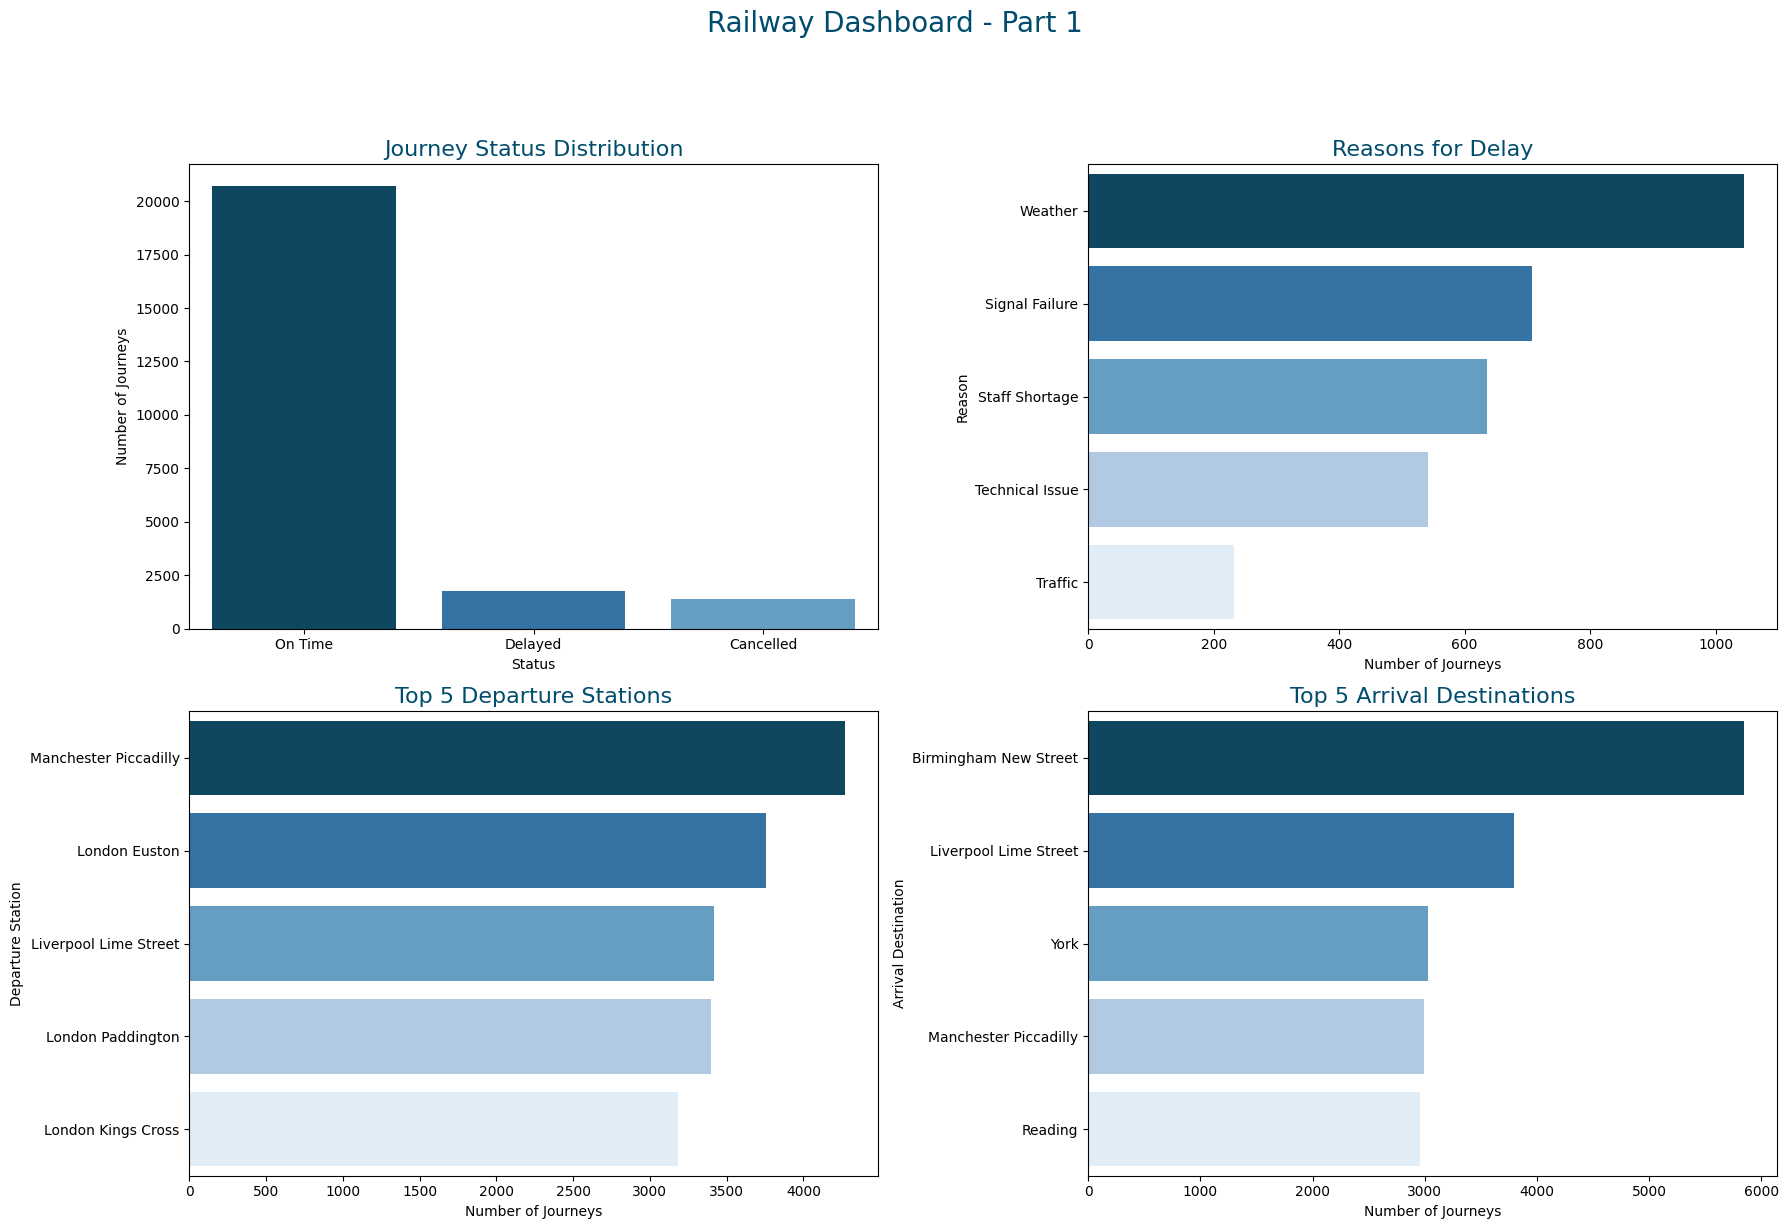

<ipython-input-6-3246c3dca64a>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs2[1])
<ipython-input-6-3246c3dca64a>:120: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs2[1])
<ipython-input-6-3246c3dca64a>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_stations.values, y=delayed_stations.index, palette=custom_palette, ax=axs2[3])


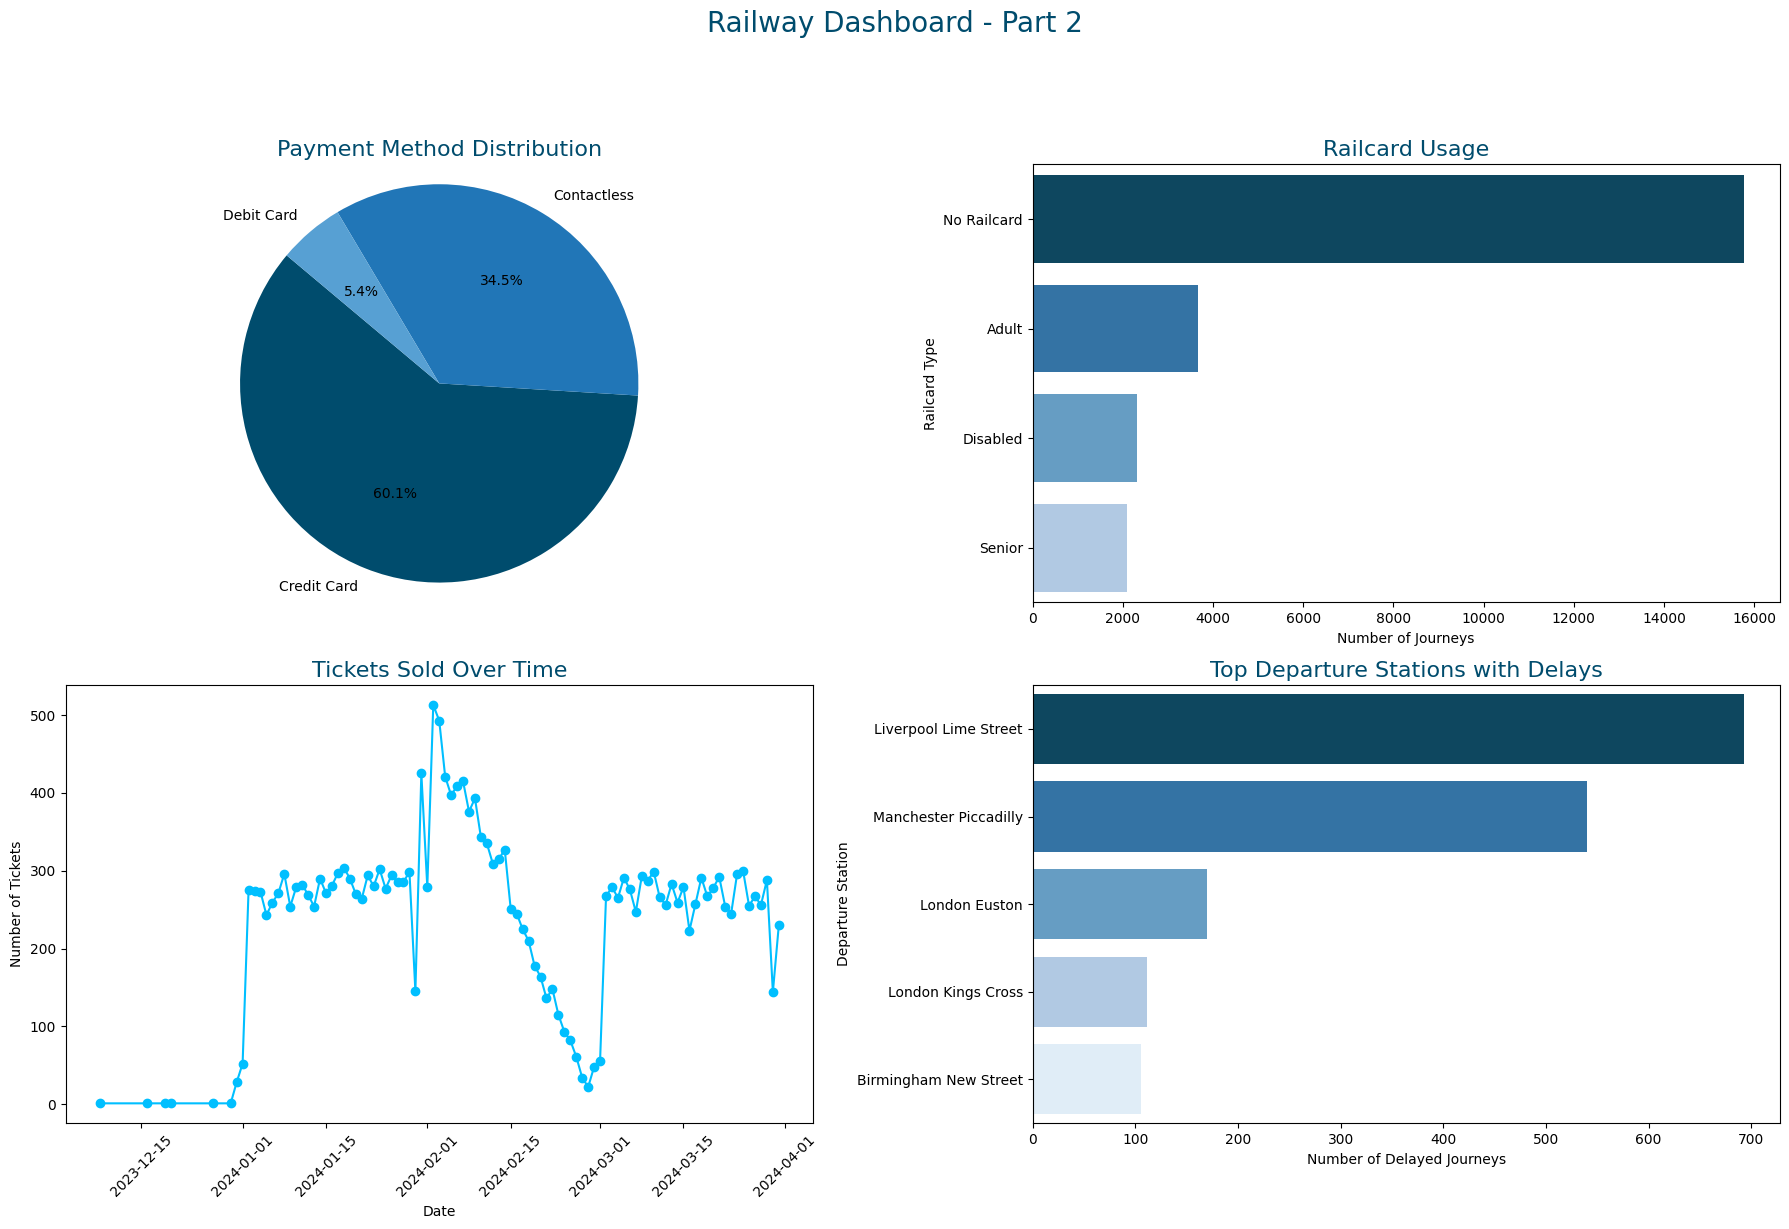

<ipython-input-6-3246c3dca64a>:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Departure_Hour'] = pd.to_datetime(df['Departure Time'], errors='coerce').dt.hour
<ipython-input-6-3246c3dca64a>:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Journey Status', y='Price', data=df, palette='Blues', ax=axs3[3])


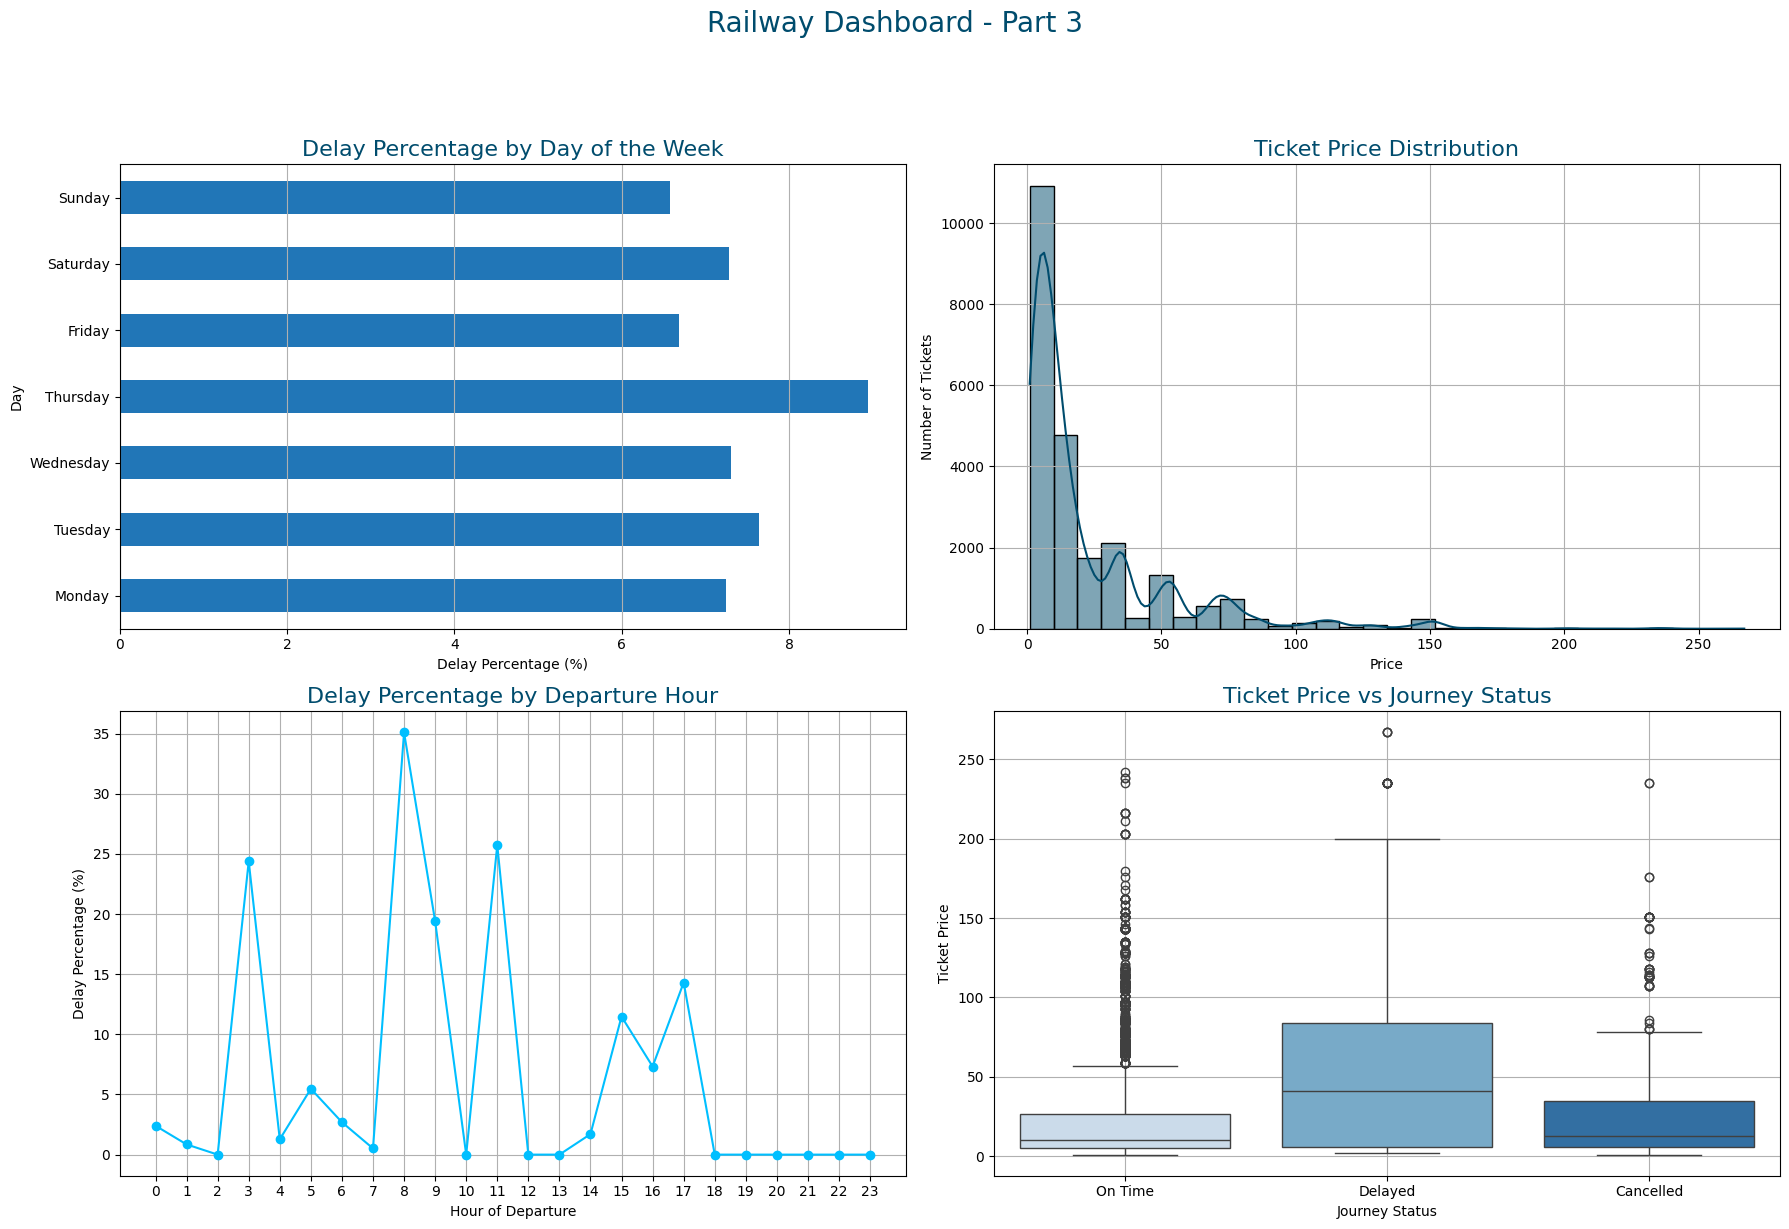

In [6]:

# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# تحميل البيانات
df = pd.read_csv(r"railway 2 .csv")


# نظافة البيانات
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df.dtypes)
print(df.duplicated().sum())

# إزالة المسافات الزائدة
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# إزالة التكرارات
df = df.drop_duplicates()

# تنضيف النصوص
str_cols = df.select_dtypes(include=['object']).columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# تحويل التواريخ
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], errors='coerce')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

# معالجة القيم الفارغة
df.loc[(df['Journey Status'] == 'On Time') & (df['Reason for Delay'].isna()), 'Reason for Delay'] = 'No Delay'
df.loc[(df['Journey Status'] == 'Delayed') & (df['Reason for Delay'].isna()), 'Reason for Delay'] = 'Unknown'
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna('Cancelled')
df['Railcard'] = df['Railcard'].fillna('No Railcard')

# تعديل بعض القيم الموحدة
df['Reason for Delay'] = df['Reason for Delay'].replace({
    'Staffing': 'Staff Shortage',
    'Weather Conditions': 'Weather'
})

# توحيد كتابة 'Signal failure' إلى 'Signal Failure'
df['Reason for Delay'] = df['Reason for Delay'].replace('Signal failure', 'Signal Failure')


print(df.isnull().sum())
print(df.dtypes)

# حفظ نسخة من الداتا بعد التنظيف
df.to_csv(r"D:\\railway 2_cleaned.csv", index=False)

# --------------------------------------

# عمل وعرض وحفظ THE DASHBOARS

sns.set_style("whitegrid")
plt.style.use('default')

# ألوان متدرجة
custom_palette = ['#004c6d', '#2176b7', '#57a0d3', '#a9c9eb', '#dceefb']

# --------------------------------------
# داش بورد 1
fig1, axs1 = plt.subplots(2, 2, figsize=(18, 12))
axs1 = axs1.flatten()

#  Journey Status Distribution
sns.countplot(x='Journey Status', data=df, palette=custom_palette, ax=axs1[0])
axs1[0].set_title('Journey Status Distribution', fontsize=16, color='#004c6d')
axs1[0].set_xlabel('Status')
axs1[0].set_ylabel('Number of Journeys')

#  Reasons for Delay
delay_reasons = df[df['Reason for Delay'] != 'No Delay']['Reason for Delay'].value_counts()
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette=custom_palette, ax=axs1[1])
axs1[1].set_title('Reasons for Delay', fontsize=16, color='#004c6d')
axs1[1].set_xlabel('Number of Journeys')
axs1[1].set_ylabel('Reason')

#  Top 5 Departure Stations
top_departure = df['Departure Station'].value_counts().head(5)
sns.barplot(x=top_departure.values, y=top_departure.index, palette=custom_palette, ax=axs1[2])
axs1[2].set_title('Top 5 Departure Stations', fontsize=16, color='#004c6d')
axs1[2].set_xlabel('Number of Journeys')
axs1[2].set_ylabel('Departure Station')

#  Top 5 Arrival Destinations
top_arrival = df['Arrival Destination'].value_counts().head(5)
sns.barplot(x=top_arrival.values, y=top_arrival.index, palette=custom_palette, ax=axs1[3])
axs1[3].set_title('Top 5 Arrival Destinations', fontsize=16, color='#004c6d')
axs1[3].set_xlabel('Number of Journeys')
axs1[3].set_ylabel('Arrival Destination')

plt.suptitle('Railway Dashboard - Part 1', fontsize=20, color='#004c6d', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])

fig1.savefig('railway_dashboard_part1.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------------------
# داش بورد 2
fig2, axs2 = plt.subplots(2, 2, figsize=(18, 12))
axs2 = axs2.flatten()

#  Payment Method Distribution
payment_methods = df['Payment Method'].value_counts()
axs2[0].pie(payment_methods.values, labels=payment_methods.index, autopct='%1.1f%%', startangle=140,
            colors=custom_palette, textprops={'color':"black"})
axs2[0].set_title('Payment Method Distribution', fontsize=16, color='#004c6d')
axs2[0].axis('equal')

#  Railcard Usage
railcard_usage = df['Railcard'].value_counts()
sns.barplot(x=railcard_usage.values, y=railcard_usage.index, palette=custom_palette, ax=axs2[1])
axs2[1].set_title('Railcard Usage', fontsize=16, color='#004c6d')
axs2[1].set_xlabel('Number of Journeys')
axs2[1].set_ylabel('Railcard Type')

#  Tickets Sold Over Time
sales_over_time = df['Date of Purchase'].value_counts().sort_index()
axs2[2].plot(sales_over_time.index, sales_over_time.values, marker='o', color='#00BFFF')
axs2[2].set_title('Tickets Sold Over Time', fontsize=16, color='#004c6d')
axs2[2].set_xlabel('Date')
axs2[2].set_ylabel('Number of Tickets')
axs2[2].tick_params(axis='x', rotation=45)

#  Top Departure Stations with Delays
delayed_stations = df[df['Journey Status'] == 'Delayed']['Departure Station'].value_counts().head(5)
sns.barplot(x=delayed_stations.values, y=delayed_stations.index, palette=custom_palette, ax=axs2[3])
axs2[3].set_title('Top Departure Stations with Delays', fontsize=16, color='#004c6d')
axs2[3].set_xlabel('Number of Delayed Journeys')
axs2[3].set_ylabel('Departure Station')

plt.suptitle('Railway Dashboard - Part 2', fontsize=20, color='#004c6d', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])

fig2.savefig('railway_dashboard_part2.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------------------

# داش بورد 3

# ضبط ستايل العرض
sns.set_style("whitegrid")
plt.style.use('default')

# إنشاء الشكل
fig3, axs3 = plt.subplots(2, 2, figsize=(18, 12))
axs3 = axs3.flatten()

#  تحليل نسبة التأخير حسب يوم الأسبوع
df['Day_of_Week'] = df['Date of Journey'].dt.day_name()
delay_by_day = df.groupby('Day_of_Week')['Journey Status'].apply(lambda x: (x == 'Delayed').mean() * 100)

delay_by_day = delay_by_day.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])  # ترتيب الأيام بشكل صحيح

delay_by_day.plot(kind='barh', color='#2176b7', ax=axs3[0])
axs3[0].set_title('Delay Percentage by Day of the Week', fontsize=16, color='#004c6d')
axs3[0].set_xlabel('Delay Percentage (%)')
axs3[0].set_ylabel('Day')
axs3[0].grid(axis='x')

#  توزيع أسعار التذاكر
sns.histplot(df['Price'], bins=30, kde=True, color='#004c6d', ax=axs3[1])
axs3[1].set_title('Ticket Price Distribution', fontsize=16, color='#004c6d')
axs3[1].set_xlabel('Price')
axs3[1].set_ylabel('Number of Tickets')
axs3[1].grid(True)

#  تحليل وقت المغادرة مقابل نسبة التأخير
df['Departure_Hour'] = pd.to_datetime(df['Departure Time'], errors='coerce').dt.hour
delay_by_hour = df.groupby('Departure_Hour')['Journey Status'].apply(lambda x: (x == 'Delayed').mean() * 100)

delay_by_hour.plot(kind='line', marker='o', color='#00BFFF', ax=axs3[2])
axs3[2].set_title('Delay Percentage by Departure Hour', fontsize=16, color='#004c6d')
axs3[2].set_xlabel('Hour of Departure')
axs3[2].set_ylabel('Delay Percentage (%)')
axs3[2].grid(True)
axs3[2].set_xticks(range(0, 24))

#  تحليل العلاقة بين سعر التذكرة وحالة الرحلة
sns.boxplot(x='Journey Status', y='Price', data=df, palette='Blues', ax=axs3[3])
axs3[3].set_title('Ticket Price vs Journey Status', fontsize=16, color='#004c6d')
axs3[3].set_xlabel('Journey Status')
axs3[3].set_ylabel('Ticket Price')
axs3[3].grid(True)

# تنسيق الشكل العام
plt.suptitle('Railway Dashboard - Part 3', fontsize=20, color='#004c6d', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# حفظ الصورة
fig3.savefig('railway_dashboard_part3.png', dpi=300, bbox_inches='tight')
plt.show()




